In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import glob
import matplotlib.pyplot as plt

In [8]:
def evaluate_combination(combination, X_train, X_test, y_train, y_test):
    """
    Calculate the fitness of an combination by training an SVM classifier and
    evaluating its performance using accuracy.
    """
    # print(f'combination: {combination}')
    selected_bands = list(np.nonzero(combination)[0])

    X_train_sel = [
        segment[selected_bands, :, :].reshape(-1) for segment in X_train
    ]
    # print(f'X_train_sel[0].shape: {X_train_sel[0].shape}')
    X_test_sel = [
        segment[selected_bands, :, :].reshape(-1) for segment in X_test
    ]

    clf = SVC(C=100, gamma='scale', kernel='rbf', class_weight='balanced')
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    return confusion_matrix(y_test, y_pred, labels=clf.classes_)

## Loading the dataset

In [9]:
# Loading dataset
X_all = []
y_all = []
for path in glob.glob('data/dataset_v3/forest/*'):
    X_all.append(np.load(path))
    y_all.append(0)

for path in glob.glob('data/dataset_v3/non_forest/*'):
    X_all.append(np.load(path))
    y_all.append(1)

# perform split
X_train, X_test, y_train, y_test = train_test_split(X_all,
                                                    y_all,
                                                    test_size=0.3)

## Specifying combinations

In [10]:
# Define desired combinations
combinations = [
    [1, 0, 0, 0, 1, 1, 0],  # 1, 5, 6
    [1, 0, 0, 1, 1, 1, 0],  # 1, 4, 5, 6
    [1, 0, 0, 1, 0, 1, 0]  # 1, 4, 6
]

In [11]:
results = []

for combination in combinations:
    combination_string = ''.join([str(x) for x in combination])
    cm = evaluate_combination(combination, X_train, X_test, y_train,
                                    y_test)
    test_data = {
        'combination': combination_string,
        'Confusion Matrix': cm
    }

    results.append(test_data)

/tmp/ipykernel_3054/3298167239.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['Forest', 'Non-Forest'])
/tmp/ipykernel_3054/3298167239.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Forest', 'Non-Forest'])


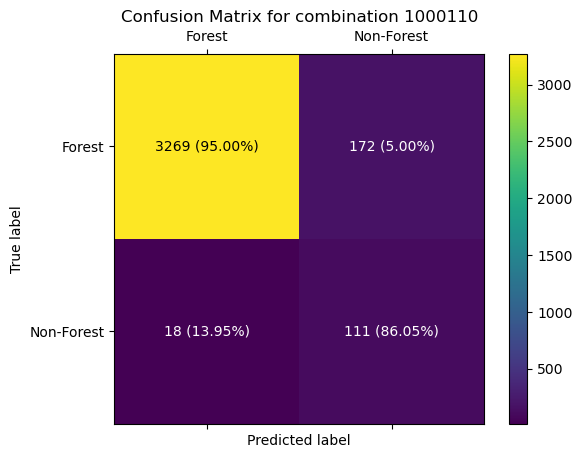

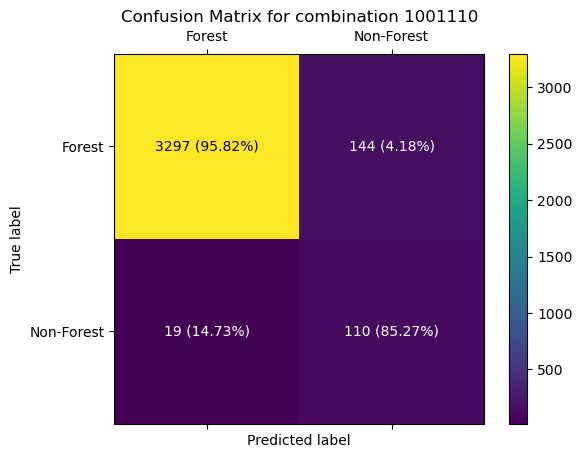

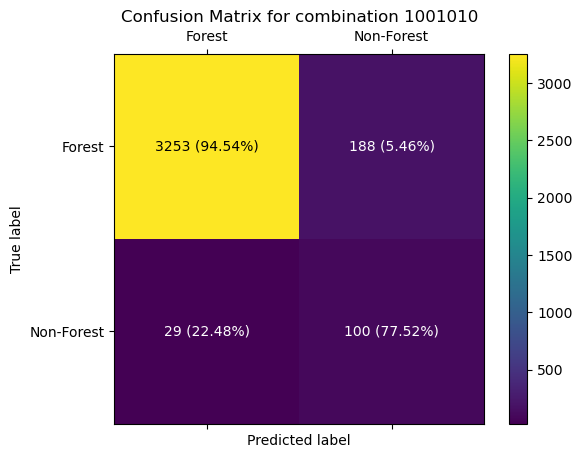

In [12]:
for result in results:
    cm = result['Confusion Matrix']
    fig = plt.figure()
    ax = fig.add_subplot()
    cax = ax.matshow(cm)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            cell_value = cm[i, j]
            normalized_value = cell_value / np.sum(cm[i, :])  # Normalize by row sum
            cell_color = cax.get_array()[i, j]
            text_color = 'black' if (cell_color / np.max(cm)) > 0.5 else 'white'
            ax.text(j, i, f'{cell_value} ({normalized_value:.2%})', ha='center', va='center', color=text_color)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + ['Forest', 'Non-Forest'])
    ax.set_yticklabels([''] + ['Forest', 'Non-Forest'])
    ax.set_title(f'Confusion Matrix for combination {result["combination"]}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()